# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 24 марта 18:00 Сдача **очная** на занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$-\bigtriangledown L = \frac{1}{n}(\frac{2}{N}\sum_{i=1}^{N}(y_{i}-a_{i})\mathbf{x}  - \frac{2}{C}\mathbf{w})$$
$$ w_{new} = w_{old} - \bigtriangledown L$$
Интуитивно градиент в данном случае напоминает вектор смещения от идеального случая с весом, равным разнице.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$-\bigtriangledown L = \frac{1}{n}(\frac{1}{N}\sum_{i=1}^{N}(y_{i}-a_{i})\mathbf{x}  - \frac{2}{C}\mathbf{w})$$
$$ w_{new} = w_{old} - \bigtriangledown L$$
Интуитивно градиент в данном случае напоминает вектор смещения от идеального случая с весом, равным разнице.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$\bigtriangledown Q = (2XX^{T} - 2X^{T}y ) \Rightarrow  Gg = 2XX^T \Rightarrow \left | Gg \right | = \left | XX^T \right | =\left | X \right |^2 \geq 0$$ (Отсюда видна положительная определенность, т.к по сути Гессиан - матрица Грамма).
Далее, при учете L2 регуляризации имеем : $$\bigtriangledown Q = (2XX^{T}\mathbf{w} - 2X^{T}y +\frac{2\mathbf{w}}{C}) =0 $$ Необходимое условие (однако не достаточное,конечно. Но т.к c > 0 и прибавляется диагональная матрица - можно считать, что все верно).
$$\Rightarrow (XX^{T}+\frac{1}{C})\mathbf{w}=X^Ty \Rightarrow \mathbf{w} = (XX^{T}+E\frac{1}{C})^{-1}X^Ty$$
Видно, что если матрица $$2XX^{T}$$ была вырождена, то после прибавления $$E\frac{1}{C}$$ она может быть невырожденной

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$-p_1ln(a) - p_0ln(1-a) \Rightarrow -ln(a) + p_0(ln(a)-ln(1-a))$ (с учетом взаимоисключаемости в событий) Возьмем производную и приравняем нулю (необходимый признак) $\Rightarrow -\frac{1}{a} + p_0(\frac{1}{a} + \frac{1}{1-a}) = 0 \Rightarrow -(1-a) + p_0 = 0 \Rightarrow a = 1 - p_0 \Rightarrow a = p_1$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Конечно. $w_0$ используется для смещения. И суть регуляризации заключается в том, чтобы сделать веса меньше  по величине, более обобщенными.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [14]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    permutation = np.random.permutation(y.shape[0])[:batch_size]
    X_batch = X[permutation]
    y_batch = y[permutation]
    #for i in 'your code here':
     #   X_batch = ""
      #  y_batch = ""
       # yield (X_batch, y_batch)
    return X_batch,y_batch
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [15]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + np.exp(-x))
    ## Your code Here
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        predict = self.predict(X_batch)        
        if self.model_type == 'lin_reg':
            difference = predict - y_batch
            loss = np.sum(np.dot(difference.T,difference)) #without additive coeff n            
        else:
            vector =np.multiply(y_batch,np.log(predict)) + np.multiply(1-y_batch,np.log(1-predict)) 
            loss =   np.sum(vector)
        loss += 2*np.dot(self.weights.T,self.weights)/self.C # regularization
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        net_input = self.net_output(X_batch) # column
        if self.model_type == 'log_reg':
            net_input = sigmoid(net_input)
        error = y_batch.T - net_input #column
        #print("batch",X_batch)
        for_bias = np.sum(error)
        delta = np.dot(error.T,X_batch) #Loss , assumed N = 1, left constant 2 
        delta = np.append(delta,for_bias) #row of updates
        regularization = 2*self.weights/self.C 
        loss_grad = -delta/y_batch.shape[0] + regularization/y_batch.shape[0]#mean value through the batch size
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad  
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''        
        # Нужно инициализровать случайно веса
        self.weights = np.zeros(1+X.shape[1]) # with w_0
        for n in range(0, self.max_epoch):
            X_batch ,y_batch =self.batch_generator(X,y)
            batch_loss = self.calc_loss(X_batch, y_batch)
            batch_grad = self.calc_loss_grad(X_batch, y_batch)
            self.update_weights(batch_grad)              
            self.errors_log['iter'].append(n)
            self.errors_log['loss'].append(batch_loss)                
        return self
    def net_output(self,X): #For comfortable calculations
        return np.dot(self.weights[1:],X.T) + self.weights[0] #weights[0] keeps bias
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        #print(self.weights,X)
        y_hat = self.net_output(X)
        y_hat = y_hat.T
        if  not self.model_type == 'lin_reg':
            y_hat = sigmoid(y_hat) 
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [16]:
def plot_decision_boundary(clf):
    k = clf[2]/clf[1]
    b = clf[0] # bias
    x = np.linspace(0,5,10)
    y = k*x + b
    plt.plot(x,y)

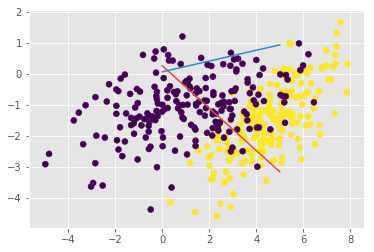

In [17]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
model_lin = MySGDClassifier(batch_generator,model_type='lin_reg',alpha = 0.001,max_epoch = 100)
model_log = MySGDClassifier(batch_generator,model_type = 'log_reg',alpha = 0.001,max_epoch = 100)
model_lin.fit(X,y)
model_log.fit(X,y)
plot_decision_boundary(model_lin.weights)
plot_decision_boundary(model_log.weights)
plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [18]:
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

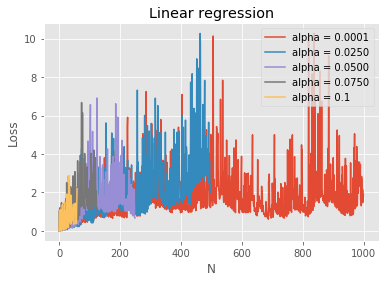

In [22]:
data_lin = []
for alpha,N in zip(np.linspace(0.0001,0.1,5),np.array([1000,500,250,125,60])):
    cl = MySGDClassifier(batch_generator,alpha = 0.01,max_epoch = N )
    cl.fit(X,y)
    data_lin.append(cl.errors_log)
for i,alpha in zip(data_lin,np.linspace(0.0001,0.1,5)):
    plt.plot(i['iter'],i['loss'],label = 'alpha = '+str(alpha)[:6])
plt.xlabel("N")
plt.ylabel("Loss")
plt.title("Linear regression")
plt.legend()


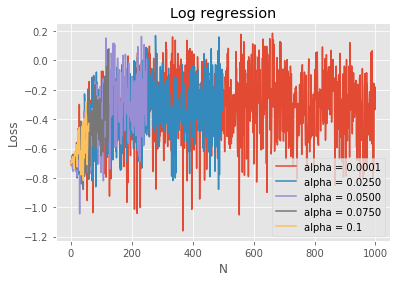

In [23]:
data_lin = []
for alpha,N in zip(np.linspace(0.0001,0.1,5),np.array([1000,500,250,125,60])):
    cl = MySGDClassifier(batch_generator,alpha = 0.01,max_epoch = N,model_type= "log_reg" )
    cl.fit(X,y)
    data_lin.append(cl.errors_log)
for i,alpha in zip(data_lin,np.linspace(0.0001,0.1,5)):
    plt.plot(i['iter'],i['loss'],label = 'alpha = '+str(alpha)[:6])
plt.xlabel("N")
plt.ylabel("Loss")
plt.title("Log regression")
plt.legend()


Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Вообще, при больших значениях $\alpha$ может быть пропущен экстремум из -за большого шага. В случае же маленького шага, наоборот, он может быть не достигнут, отребуется много итераций.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

No handles with labels found to put in legend.


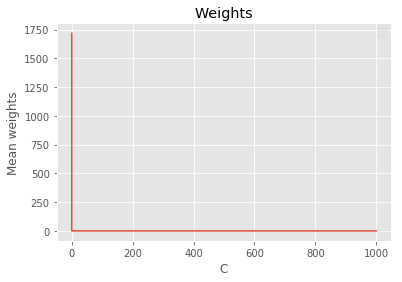

In [24]:
data_lin = []
for C_ in np.logspace(3,-3,10):
    cl = MySGDClassifier(batch_generator, C = C_)
    cl.fit(X,y)
    data_lin.append(np.mean(cl.weights))
plt.plot(np.logspace(3,-3,10),data_lin)
plt.xlabel("C")
plt.ylabel("Mean weights")
plt.title("Weights")
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Конечно

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [31]:
import codecs
f = codecs.open( "docs_titles.tsv", "r", "utf_8_sig" )
doc_to_title = {}
for num_line, line in enumerate(f):
    if num_line == 0:
        continue
    data = line.strip().split('\t', 1)
    doc_id = int(data[0])
    if len(data) == 1:
        title = ''
    else:
        title = data[1]
    doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [32]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [33]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [34]:
from sklearn.metrics import f1_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.model_selection import KFold
from tqdm import tqdm_notebook
folds = 5
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) 
param_grid = {
    'alpha':[0.01,0.1,1,10, 100,1000],
    'max_iter' : [100,200,300,400,500,600]
}
batcher  = KFold(n_splits = folds)
score_params = {}
for border in tqdm_notebook([0.1,0.2,0.3,0.4]):
    for alpha in param_grid['alpha']:
        for max_iter in param_grid['max_iter']:
            model = Ridge(alpha = alpha, max_iter = max_iter)
            scores = []
            for train_ind , test_ind in batcher.split(X_train):
                x_train_,x_test_ = X_train_[train_ind],X_train_[test_ind]
                y_train_,y_test_ = y_train[train_ind], y_train[test_ind]                
                model.fit(x_train_,y_train_)
                scores.append(f1_score(y_test_, model.predict(x_test_) > border))
            score = np.mean(scores)
            score_params[(alpha,max_iter,border)] = score

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [37]:
sorted(score_params,key = lambda x : score_params[x])[-1] #Returns alpha, max_iter ,border

(100, 600, 0.3)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

#####  Оптимальный порог - 0.3

In [39]:
score_params[(100, 600, 0.3)] #best score

0.6139446020913146

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

##### Обучение модели с данными параметрами после предсказания дает итог в 0.61461

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Вообщем, в процессе выполнения домашнего задания неясности устраняются ***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** Иногда возникали неточности при выполнении домашнего задания в коде. Например, ошибки кодеков, несоответствие предлагаемой модели и используемой фактически (Ridge вместо LinearRegressor), выбор batch - функции (пришлось значительно исправлять код. Хотя это штрафуется, но иначе было проблематично выполнить задание).Но , в целом, интересно.***